<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_ICA_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# Reshape images to 1D vector
x_train_reshaped = x_train.reshape(x_train.shape[0], 784)
x_test_reshaped = x_test.reshape(x_test.shape[0], 784)

In [14]:
def convert_to_binary_labels(labels):
  """Converts labels to binary (0 for even, 1 for odd)."""
  binary_labels = (labels % 2 != 0).astype(int)
  return binary_labels

In [15]:
y_train_binary = convert_to_binary_labels(y_train)
y_test_binary = convert_to_binary_labels(y_test)

In [27]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x_train_reshaped, y_train_binary, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test_binary))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9096 - loss: 1.5946 - val_accuracy: 0.9592 - val_loss: 0.1641
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9660 - loss: 0.1180 - val_accuracy: 0.9628 - val_loss: 0.1357
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9695 - loss: 0.0999 - val_accuracy: 0.9719 - val_loss: 0.0842
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0723 - val_accuracy: 0.9755 - val_loss: 0.0750
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9811 - loss: 0.0561 - val_accuracy: 0.9731 - val_loss: 0.0753
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9828 - loss: 0.0508 - val_accuracy: 0.9814 - val_loss: 0.0558
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0413 - val_accuracy: 0.9831 - val_loss: 0.0545
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9878 - loss: 0.0353 -

In [31]:
model.evaluate(x_test_reshaped, y_test_binary)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9793 - loss: 0.0997


[0.09141746908426285, 0.9817000031471252]

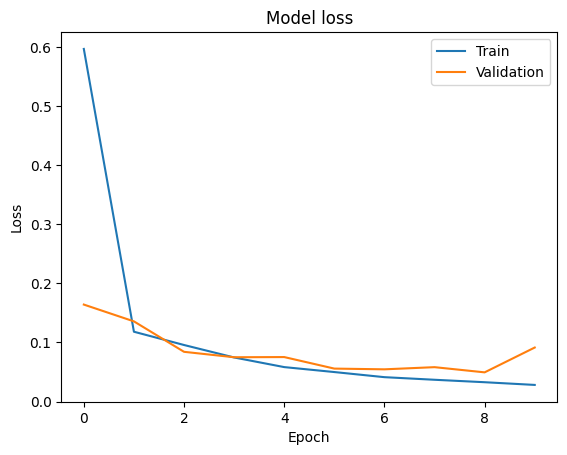

In [32]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [40]:
## Solving MNIST 10 Class classification problem

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

model_10_class = Sequential()
model_10_class.add(Dense(128, activation='relu', input_shape=(784,)))
model_10_class.add(Dense(64, activation='relu'))
model_10_class.add(Dense(10, activation='softmax'))

model_10_class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_10_class.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7867 - loss: 4.3697 - val_accuracy: 0.9192 - val_loss: 0.3121
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9282 - loss: 0.2669 - val_accuracy: 0.9440 - val_loss: 0.2041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9450 - loss: 0.1968 - val_accuracy: 0.9456 - val_loss: 0.1921
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9604 - loss: 0.1407 - val_accuracy: 0.9585 - val_loss: 0.1475
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9630 - loss: 0.1289 - val_accuracy: 0.9465 - val_loss: 0.2190
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9676 - loss: 0.1168 - val_accuracy: 0.9572 - val_loss: 0.1588
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9729 - loss: 0.0996 - val_accuracy: 0.9635 - val_loss: 0.1438
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9760 - loss: 0.0899 - val_accura

In [43]:
model_10_class.evaluate(x_test_reshaped, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1899


[0.15409508347511292, 0.963100016117096]

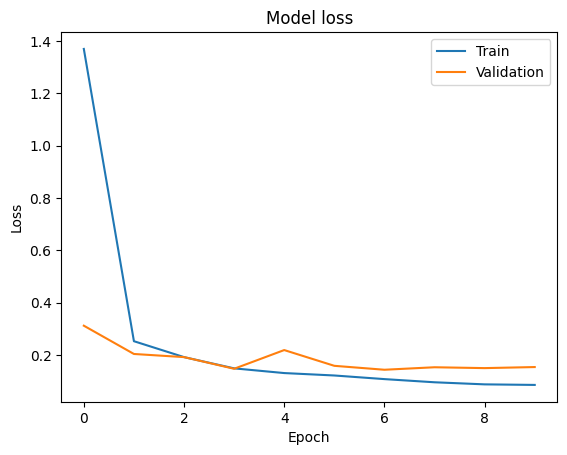

In [44]:
plt.plot(model_10_class.history.history['loss'])
plt.plot(model_10_class.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [45]:
y_one_hot_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_one_hot_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [46]:
model_10_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_10_class.fit(x_train_reshaped, y_one_hot_train, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_one_hot_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9779 - loss: 0.0831 - val_accuracy: 0.9630 - val_loss: 0.1687
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9800 - loss: 0.0755 - val_accuracy: 0.9701 - val_loss: 0.1563
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9821 - loss: 0.0677 - val_accuracy: 0.9692 - val_loss: 0.1617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9824 - loss: 0.0626 - val_accuracy: 0.9735 - val_loss: 0.1506
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9841 - loss: 0.0614 - val_accuracy: 0.9738 - val_loss: 0.1671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9837 - loss: 0.0620 - val_accuracy: 0.9694 - val_loss: 0.1850
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0548 - val_accuracy: 0.9689 - val_loss: 0.1789
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9871 - loss: 0.0500 -

In [47]:
model_10_class.evaluate(x_test_reshaped, y_one_hot_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.2611


[0.21253207325935364, 0.97079998254776]

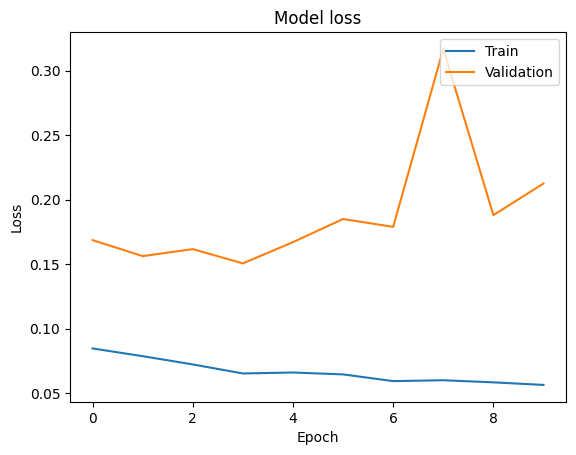

In [48]:
plt.plot(model_10_class.history.history['loss'])
plt.plot(model_10_class.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()